<a href="https://colab.research.google.com/github/sseozy/2022-study/blob/opencv/photo_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

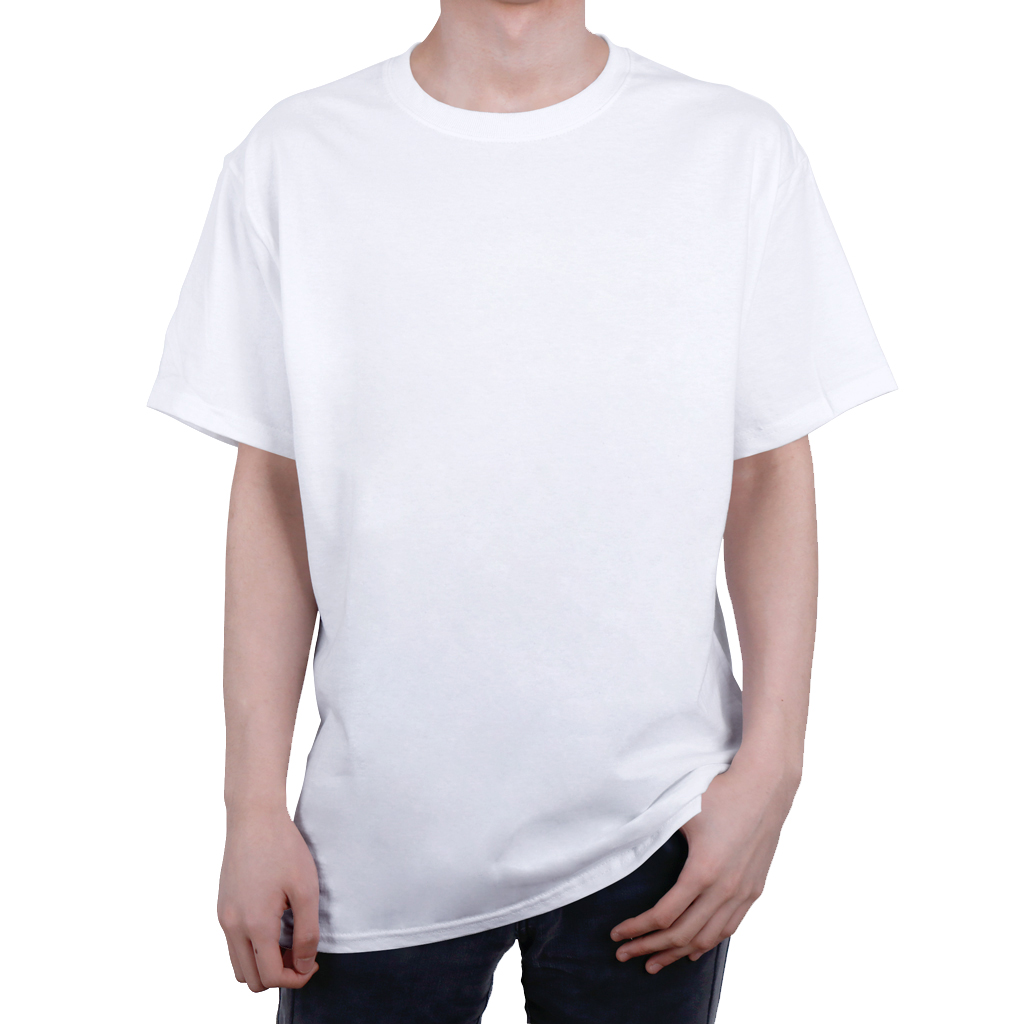

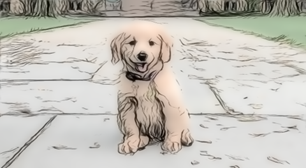

-1

In [ ]:
import cv2

background = cv2.imread("/content/drive/MyDrive/이미지합성/tshirts.jpg")
logo = cv2.imread("/content/drive/MyDrive/이미지합성/dog.png")

from google.colab.patches import cv2_imshow
cv2_imshow(background)
cv2_imshow(logo)
cv2.waitKey()

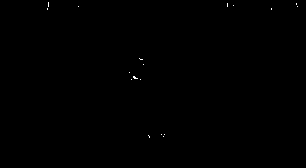

-1

In [ ]:
gray_logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
_, mask_inv = cv2.threshold(gray_logo, 10, 255, cv2.THRESH_BINARY_INV)

cv2_imshow(mask_inv)
cv2.waitKey()

In [ ]:
#수학 좌표명면과 다르게 0, 0을 기준으로
#오른쪽으로 갈수록 x값이 증가하고
#아래쪽으로 갈수록 y값이 증가합니다.

In [ ]:
logo.shape

(168, 306, 3)

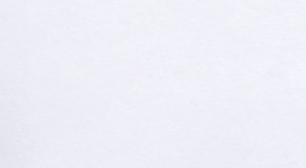

-1

In [ ]:
background_height, background_width, _ = background.shape # 1024, 1024, 3
logo_height, logo_width, _ = logo.shape # 168, 306, 3

x = (background_height - logo_height) // 3 # /2의 몫만 가져옴 (정수만 가져오기 위해)
y = (background_width - logo_width) // 2

roi = background[x: x+logo_height, y: y+logo_width]
cv2_imshow(roi)
cv2.waitKey()

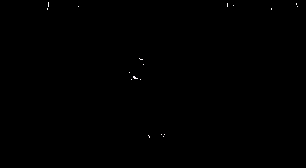

-1

In [ ]:
roi_logo = cv2.add(logo, roi, mask=mask_inv)
cv2_imshow(roi_logo)
cv2.waitKey()

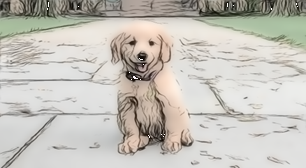

-1

In [ ]:
result = cv2.add(roi_logo, logo)
cv2_imshow(result)
cv2.waitKey()

In [ ]:
import numpy as np

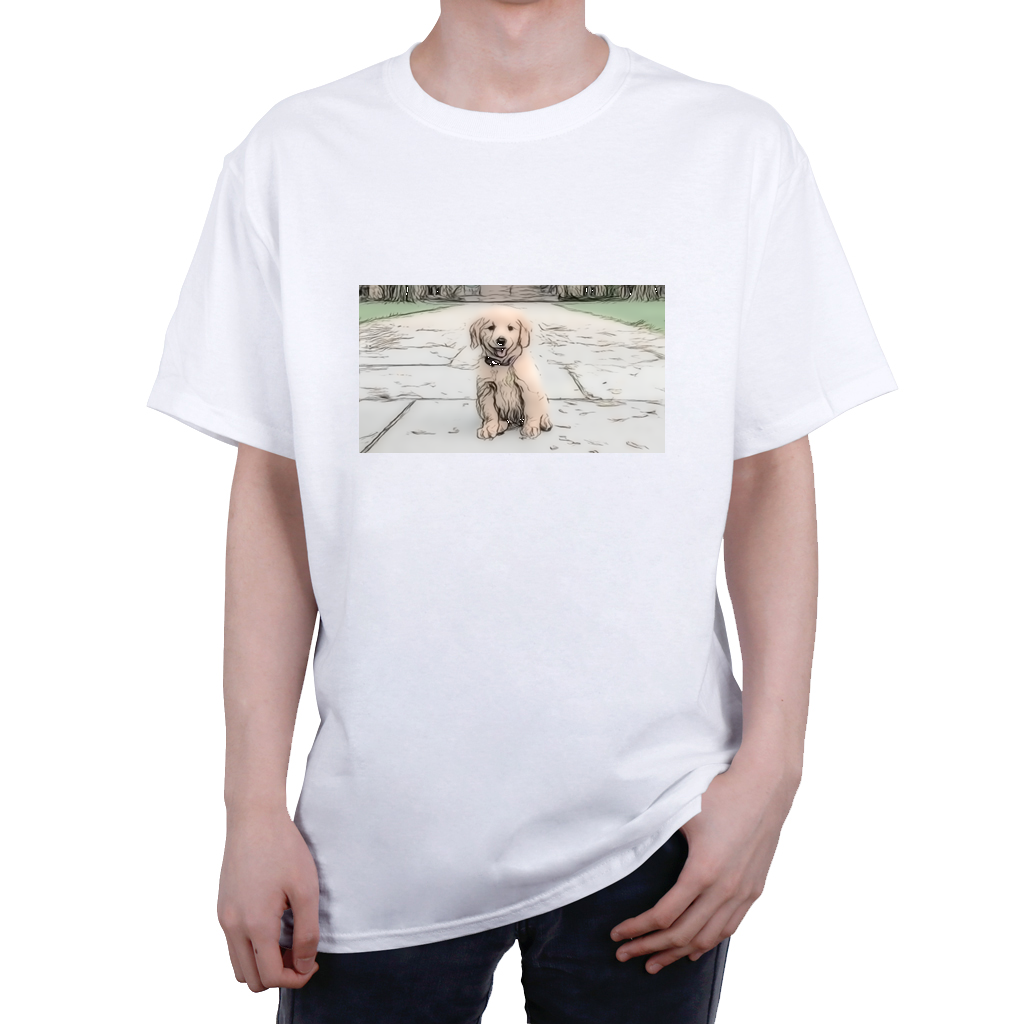

-1

In [ ]:
np.copyto(roi, result)
cv2_imshow(background)
cv2.waitKey()